3: Fraud Use Case

# 1. How do you retrieve data for processing (describe it without code)?
When data is published to a topic (e.g., the "metrics" topic in this scenario), it typically resides in a message queue or a streaming platform, which allows multiple consumers to retrieve data for processing. In a PubSub model, you would have "publishers" that send data to the topic and "subscribers" that consume the data.

To retrieve data for processing:


1.   Set up a subscriber for the "metrics" topic.
2.   The subscriber will listen for new messages being published to the topic.
3.   As messages arrive in the topic, the subscriber retrieves them for processing.
4.   Once a message is successfully consumed and acknowledged by the subscriber, it is typically removed from the queue (to prevent re-processing).

# 2. PubSub costs have gone up after scaling out; why is that and how would you reduce it?
When you scale your solution horizontally by adding more processing instances (pods), each pod will likely have its own subscriber to the PubSub system. Each subscriber performs a pull operation to fetch messages from the topic. If you're using a synchronous pull approach, each pull request may result in network and API call overheads. Thus, the increased number of pods (subscribers) leads to more frequent pull requests, which can raise the costs.

To reduce costs:

1. Batching: Instead of pulling messages one by one, use batched pull requests to retrieve multiple messages in a single pull. This reduces the number of API calls.
2. Async Pull: Switch to an asynchronous pull approach, where the subscriber maintains an open connection to the PubSub system and receives messages as they arrive. This can reduce the frequency and overhead of the pull operations.
3. Shared Subscription: Use shared subscription models, where multiple instances (pods) share a single subscription. This ensures that each message is delivered to one and only one pod, reducing overheads and potential duplication.


# 3. Deploying your Sklearn/Scikit model into a Beam pipeline:
The Apache Beam Python SDK allows you to build data processing pipelines that can run on various runners including Dataflow. Here's a brief approach:

1. Setup: Install the required packages (apache-beam and others) and set up the necessary environment for Beam.
2. Read from PubSub: Use the ReadFromPubSub method in Beam to consume messages from the topic.
3. Process Data: Once data is read, apply the necessary transformations and feed it to your Sklearn model for prediction.
4. Write Results: After processing, you can write results (e.g., whether the data point is an outlier) to another PubSub topic or another sink.
5. Run the Pipeline: Finally, run the pipeline on your desired runner, such as Dataflow.

a simple Python code for this approach.



```
# This is a basic outline of what the Apache Beam pipeline code might look like.
# Note: This is a mock code for illustrative purposes and won't run in this environment.

# (We are not executing this; it's just to illustrate the concept.)

"""
from apache_beam import Pipeline, DoFn, ParDo
from apache_beam.io import ReadFromPubSub, WriteToPubSub
from sklearn.externals import joblib

class PredictDoFn(DoFn):
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = None

    def setup(self):
        # Load the Sklearn model
        self.model = joblib.load(self.model_path)

    def process(self, element):
        # Predict using the model
        prediction = self.model.predict([element])
        yield prediction

def run_pipeline():
    pipeline_options = ... # Setup pipeline options, e.g., for DataflowRunner
    model_path = 'path_to_your_model.pkl'

    with Pipeline(options=pipeline_options) as p:
        (p | 'Read from PubSub' >> ReadFromPubSub(topic='your_topic_name')
           | 'Predict using Sklearn' >> ParDo(PredictDoFn(model_path=model_path))
           | 'Write Results to PubSub' >> WriteToPubSub(topic='your_output_topic_name'))

run_pipeline()
"""

# Remember, this is just a skeleton of the code. In real-world scenarios,
# more configurations, error handling, and transformations may be required.
```
Here's an illustrative overview of the Python code to deploy your Sklearn/Scikit model into a Beam pipeline:

1. Import Necessary Libraries: We import the required modules from Apache Beam, including functionalities to read from and write to PubSub. We also import joblib from sklearn.externals to load our pre-trained Sklearn model.

2. Define a DoFn for Prediction: The PredictDoFn class is a custom DoFn (Do Function) that will apply the model's prediction on each element (data point) it receives.
In the setup method, we load our pre-trained Sklearn model.
In the process method, we perform prediction using the loaded model for each incoming element and yield the prediction.
3. Define the Pipeline:We set up pipeline options such as configurations for the DataflowRunner.
We define our pipeline within the run_pipeline function:
Read data from the PubSub topic using ReadFromPubSub.
Predict using the Sklearn model with our custom PredictDoFn.
Write the prediction results back to another PubSub topic using WriteToPubSub.
4. Run the Pipeline: Finally, we initiate the pipeline execution with run_pipeline()


#**Part 2: Streaming Applications**

In [2]:
!pip install apache_beam
!pip install sklearn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 28.4 MB/s eta 0:00:00
  Created wheel for crcmod: filename=crcmod-1.7-cp310-cp310-linux_x86_64.whl size=31406 sha256=041adec625f17db080

In [3]:
#MOUNT Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.	Join the input files as streams using CoGroupByKey**

In [4]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io import ReadFromText
from apache_beam.io import WriteToText

# Define the pipeline
pipeline_options = PipelineOptions()
p = beam.Pipeline(options=pipeline_options)

# Define a function to parse the users.csv lines
def parse_users_csv(line):
    fields = line.split('\t')
    user_id = str(fields[0].strip())
    return (user_id, fields[1:])

# Define a function to parse the orders.csv lines
def parse_orders_csv(line):
    fields = line.split(';')
    user_id = str(fields[1].strip())
    return (user_id, fields[0:])

# Read and parse users.csv
users = (p | 'Read Users CSV' >> ReadFromText('/content/drive/My Drive/Datasets/users_v.csv')
          | 'Parse Users CSV' >> beam.Map(parse_users_csv))

# Read and parse orders.csv
orders = (p | 'Read Orders CSV' >> ReadFromText('/content/drive/My Drive/Datasets/orders_v_2022.csv')
          | 'Parse Orders CSV' >> beam.Map(parse_orders_csv))

# Join using CoGroupByKey
joined = ({'users': users, 'orders': orders} | 'Join Data' >> beam.CoGroupByKey())

# For demonstration, we'll write the joined results to a file
(joined | 'Write Results' >> WriteToText('/content/drive/My Drive/Datasets/joined_results.txt'))

# Run the pipeline
p.run()


**2.	Perform a transformation that determines the average number of orders for female and male customers, respectively. Output the result as text in the notebook.**

In [ ]:
import apache_beam as beam
from apache_beam.io import ReadFromText, WriteToText

# Define the pipeline
p = beam.Pipeline()

# Define parsing functions (assuming they're the same as the ones you've defined previously)
def parse_users_csv(line):
    fields = line.split('\t')
    user_id = str(fields[0].strip())
    return (user_id, fields[1:])

def parse_orders_csv(line):
    fields = line.split(';')
    user_id = str(fields[1].strip())
    return (user_id, fields[0:])

# Read and parse users.csv
users = (p | 'Read Users CSV' >> ReadFromText('/content/drive/My Drive/Datasets/users_v.csv')
          | 'Parse Users CSV' >> beam.Map(parse_users_csv))

# Read and parse orders.csv
orders = (p | 'Read Orders CSV 2' >> ReadFromText('/content/drive/My Drive/Datasets/orders_v_2022.csv')
          | 'Parse Orders CSV 2' >> beam.Map(parse_orders_csv))

# Join using CoGroupByKey
joined = ({'users': users, 'orders': orders} | 'Join Data 2' >> beam.CoGroupByKey())

# Rest of your code remains mostly unchanged:

# Define a function to count orders by gender
def count_orders(element, gender):
    user_id, data = element
    user_data, orders_data = data['users'], data['orders']

    print("User Data:", user_data)
    print("Orders Data:", orders_data)
    if not user_data:
        return (gender, 0)

    if len(user_data[0]) < 2:
        return (gender, 0)

    if user_data[0][1] == gender:
        return (gender, len(orders_data))
    else:
        return (gender, 0)


# Implementing the Apache Beam pipeline to process the datasets

# Updated pipeline
p_updated = beam.Pipeline()

# Read and parse users.csv
users = (p_updated
         | 'Read Users CSV Updated' >> ReadFromText('/content/drive/My Drive/Datasets/users_v.csv', skip_header_lines=1)
         | 'Parse Users CSV Updated' >> beam.Map(parse_users_csv))

# Read and parse orders.csv
orders = (p_updated
          | 'Read Orders CSV Updated' >> ReadFromText('/content/drive/My Drive/Datasets/orders_v_2022.csv', skip_header_lines=1)
          | 'Parse Orders CSV Updated' >> beam.Map(parse_orders_csv))

# Join using CoGroupByKey
joined = ({'users': users, 'orders': orders}
          | 'Join Data Updated' >> beam.CoGroupByKey())

# Count orders for male and female customers
male_orders = joined | 'Filter and Count Male Orders Updated' >> beam.Map(count_orders, 'male')
female_orders = joined | 'Filter and Count Female Orders Updated' >> beam.Map(count_orders, 'female')

# Compute the average number of orders for male and female customers
average_male_orders = (male_orders
                       | 'Average Male Orders Updated' >> beam.CombinePerKey(beam.combiners.MeanCombineFn()))
average_female_orders = (female_orders
                         | 'Average Female Orders Updated' >> beam.CombinePerKey(beam.combiners.MeanCombineFn()))

# Flatten the results from male and female pipelines into a single PCollection
results_updated = [average_male_orders, average_female_orders] | beam.Flatten()

# Write the results to a file
results_path = '/content/drive/My Drive/Datasets/average_orders_by_gender_updated.txt'
results_updated | 'Write Average Results Updated' >> beam.io.WriteToText(results_path, shard_name_template='')

# Run the pipeline
p_updated.run()

results_path



**3.	Duplicate the code of previous question (in a new cell) and split your pipe to produce/emit the total number or orders processed as an additional text output (i.e. output the number of orders processed as well the average orders for female and male customers).**

In [6]:
# Import necessary modules
import apache_beam as beam
from apache_beam.io import WriteToText
from apache_beam.options.pipeline_options import PipelineOptions

# Define the count_orders function (make sure it's error-resistant as previously modified)

def count_orders(element, gender):
    user_id, data = element
    user_data, orders_data = data['users'], data['orders']
    if user_data and user_data[0][1] == gender:
        return (gender, len(orders_data))
    else:
        return (gender, 0)

# Create the Beam pipeline
pipeline_options = PipelineOptions()
p = beam.Pipeline(options=pipeline_options)

# Total number of orders
total_orders = (joined
                | 'Extract All Orders' >> beam.FlatMap(lambda x: x[1]['orders'])
                | 'Count All Orders' >> beam.combiners.Count.Globally()
                | 'Write Total Orders' >> WriteToText('/content/drive/My Drive/Datasets/total_orders.txt'))

# Count orders for male and female customers
male_orders = joined | 'Filter and Count Male Orders' >> beam.Map(count_orders, 'male')
female_orders = joined | 'Filter and Count Female Orders' >> beam.Map(count_orders, 'female')

# Compute the average number of orders for male and female customers
average_male_orders = (male_orders
                       | 'Average Male Orders' >> beam.CombinePerKey(beam.combiners.MeanCombineFn()))
average_female_orders = (female_orders
                         | 'Average Female Orders' >> beam.CombinePerKey(beam.combiners.MeanCombineFn()))

# Combine results
results = [average_male_orders, average_female_orders] | beam.Flatten()

# For demonstration, write the results to a file
results | 'Write Average Results' >> WriteToText('/content/drive/My Drive/Datasets/average_orders_by_gender2.txt')

# Run the pipeline
result = p.run()
result.wait_until_finish()


'DONE'

**4.	Generate a graph (using the Beam library) of your pipeline and upload the image file to us.**

In [7]:
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner
import apache_beam.runners.interactive.interactive_beam as ib
from apache_beam.io import ReadFromText, WriteToText
import apache_beam as beam

# Functions to parse the CSV files
def parse_users_csv(line):
    fields = line.split('\t')
    if len(fields) < 6:  # Assuming there are 6 columns in users.csv
        return (None, [])  # Return a dummy value for improperly formatted lines
    user_id = fields[0]
    return (user_id, fields[1:])

def parse_orders_csv(line):
    fields = line.split(';')
    if len(fields) < 2:  # Assuming there are at least 2 columns in orders.csv
        return (None, [])  # Return a dummy value for improperly formatted lines
    user_id = fields[1]
    return (user_id, fields[0:])

def count_orders(element, gender):
    user_id, data = element
    user_data, orders_data = data['users'], data['orders']

    # Safety check: Ensure user_data has at least one record with at least two elements
    if not user_data or len(user_data[0]) < 2:
        return (gender, 0)

    if user_data[0][1] == gender:
        return (gender, len(orders_data))
    else:
        return (gender, 0)

# Create a pipeline with the InteractiveRunner
p = beam.Pipeline(runner=InteractiveRunner())

# Read and parse the CSV files
users = (p | 'Read Users CSV' >> ReadFromText('/content/drive/My Drive/Datasets/users_v.csv')
          | 'Parse Users CSV' >> beam.Map(parse_users_csv))

orders = (p | 'Read Orders CSV' >> ReadFromText('/content/drive/My Drive/Datasets/orders_v_2022.csv')
          | 'Parse Orders CSV' >> beam.Map(parse_orders_csv))

# Join the data
joined = ({'users': users, 'orders': orders} | 'Join Data' >> beam.CoGroupByKey())

# Total number of orders
total_orders = (joined
                | 'Extract All Orders' >> beam.FlatMap(lambda x: x[1]['orders'])
                | 'Count All Orders' >> beam.combiners.Count.Globally())
total_orders | 'Write Total Orders' >> WriteToText('total_orders.txt')

# Average orders by gender
male_orders = joined | 'Filter and Count Male Orders' >> beam.Map(count_orders, 'male')
female_orders = joined | 'Filter and Count Female Orders' >> beam.Map(count_orders, 'female')

average_male_orders = (male_orders
                       | 'Average Male Orders' >> beam.CombinePerKey(beam.combiners.MeanCombineFn()))
average_female_orders = (female_orders
                         | 'Average Female Orders' >> beam.CombinePerKey(beam.combiners.MeanCombineFn()))

results = [average_male_orders, average_female_orders] | beam.Flatten()
results | 'Write Average Results' >> WriteToText('/content/drive/My Drive/Datasets/average_orders_by_gender.txt')

# Visualize the pipeline
# Run the pipeline
result = p.run()
result.wait_until_finish()

# Visualize the pipeline
ib.show(average_male_orders, average_female_orders)


1. **5.	Perform a transformation that groups users into age groups [16-26), [26-36), [36-46), [46-56), and determine the total number of orders placed by customers in each age group.**
2. **6.	Determine the total number of times that spinach was purchased within the [16-26), [26-36), [36-46), [46-56) age groups.**



In [8]:
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner
import apache_beam.runners.interactive.interactive_beam as ib
from apache_beam.io import ReadFromText, WriteToText
import apache_beam as beam

# Define the function to classify age groups
def classify_age_group(user_data):
    """Classify users into age groups based on their age."""

    # Safety check
    if len(user_data) < 3:
        return 'unknown'

    try:
        age = int(user_data[2])
    except ValueError:
        return 'unknown'

    if 16 <= age < 26:
        return '16-26'
    elif 26 <= age < 36:
        return '26-36'
    elif 36 <= age < 46:
        return '36-46'
    elif 46 <= age < 56:
        return '46-56'
    else:
        return 'other'

def extract_orders_by_age(element):
    users_data = element[1].get('users', [])
    orders_data = element[1].get('orders', [])

    # Check if users_data exists and is not empty
    if not users_data:
        return []

    return [(users_data[0][0], order) for order in orders_data]

# Create a pipeline with the InteractiveRunner
p = beam.Pipeline(runner=InteractiveRunner())

# Read and parse the CSV files
users = (p | 'Read Users CSV' >> ReadFromText('/content/drive/My Drive/Datasets/users_v.csv')
          | 'Parse Users CSV' >> beam.Map(parse_users_csv))

orders = (p | 'Read Orders CSV' >> ReadFromText('/content/drive/My Drive/Datasets/orders_v_2022.csv')
          | 'Parse Orders CSV' >> beam.Map(parse_orders_csv))

# Classify users into age groups
users_with_age_group = users | 'Classify Age Group' >> beam.Map(lambda x: (x[0], (classify_age_group(x[1]), x[1])))

# Join with orders data
joined_by_age = ({'users': users_with_age_group, 'orders': orders} | 'Join by Age' >> beam.CoGroupByKey())

# Count orders by age group
orders_by_age = (joined_by_age
                 | 'Extract Orders by Age' >> beam.FlatMap(extract_orders_by_age)
                 | 'Count Orders by Age' >> beam.combiners.Count.PerKey())
orders_by_age | 'Write Orders by Age' >> WriteToText('orders_by_age.txt')

# Count spinach purchases by age group
spinach_orders_by_age = (joined_by_age
                         | 'Extract Spinach Orders by Age' >> beam.FlatMap(lambda x: [(x[1]['users'][0][0], order) for order in x[1]['orders'] if 'Spinach' in order[1]])
                         | 'Count Spinach Orders by Age' >> beam.combiners.Count.PerKey())
spinach_orders_by_age | 'Write Spinach Orders by Age' >> WriteToText('/content/drive/My Drive/Datasets/samplespinach_orders_by_age.txt')

# Run the pipeline
p.run()


#Stream Analytics Cont.

1.	Write a pipeline which calculates the average number of orders over seven and thirty day rolling windows (where the period of each window is one day).
2.	Modify this pipeline to write the output files to Parquet instead of CSV.


In [9]:
from datetime import datetime
from apache_beam.transforms.window import SlidingWindows
from apache_beam.io.parquetio import WriteToParquet
from pyarrow import table
import pyarrow as pa
# Define the schema for the Parquet output
parquet_schema = pa.schema([
    ('window', pa.string()),  # Assuming window is a string representation
    ('average_orders', pa.float64())
])
# Parse the date from the orders CSV
def parse_date_from_order(order):
    date_str = order[3]
    return datetime.strptime(date_str, '%Y-%m-%d')

# Pipeline setup
p = beam.Pipeline()

# Read and parse the orders CSV
orders = (p | 'Read Orders CSV' >> ReadFromText('/content/drive/My Drive/Datasets/orders_v_2022.csv')
          | 'Parse Orders CSV' >> beam.Map(parse_orders_csv))

# Define windowing logic
seven_day_window = SlidingWindows(size=7*24*60*60, period=24*60*60)
thirty_day_window = SlidingWindows(size=30*24*60*60, period=24*60*60)

# Average number of orders over 7-day and 30-day windows
# Average number of orders over 7-day and 30-day windows
avg_orders_7_days = (orders
                     | 'Window 7 days' >> beam.WindowInto(seven_day_window)
                     | 'Count 7 days' >> beam.combiners.Count.Globally().without_defaults()
                     | 'Average 7 days' >> beam.combiners.Mean.Globally().without_defaults())

avg_orders_30_days = (orders
                      | 'Window 30 days' >> beam.WindowInto(thirty_day_window)
                      | 'Count 30 days' >> beam.combiners.Count.Globally().without_defaults()
                      | 'Average 30 days' >> beam.combiners.Mean.Globally().without_defaults())


# Combine results
# Use a DoFn to format the results and include window information
class FormatResult(beam.DoFn):
    def process(self, element, window=beam.DoFn.WindowParam):
        try:
            start = window.start.to_utc_datetime().date()
            end = window.end.to_utc_datetime().date()
            window_str = f"{start} - {end}"
            return [{'window': window_str, 'average_orders': element}]
        except OverflowError:
            # Handle or log the error as appropriate for your application
            return []


# Combine both 7-day and 30-day window results
results = ([(avg_orders_7_days, '7 days'), (avg_orders_30_days, '30 days')]
           | beam.Flatten()
           | beam.ParDo(FormatResult()))

# Write results to Parquet
(results
 | 'Write to Parquet' >> WriteToParquet('/content/drive/My Drive/Datasets/output.parquet', schema=parquet_schema))

# Run the pipeline
p.run()


#Question 6: Anomaly Detection on Streams

**1.	Produce an exploratory data analysis (EDA) notebook to investigate the initial data. Summarise your conclusions/insights in the topmost cell block (in markdown).**

        Unnamed: 0        metric
count  10000.00000  10000.000000
mean    4999.50000   1123.931977
std     2886.89568     63.648404
min        0.00000   1023.850000
25%     2499.75000   1062.987500
50%     4999.50000   1122.875000
75%     7499.25000   1174.842500
max     9999.00000   1242.890000


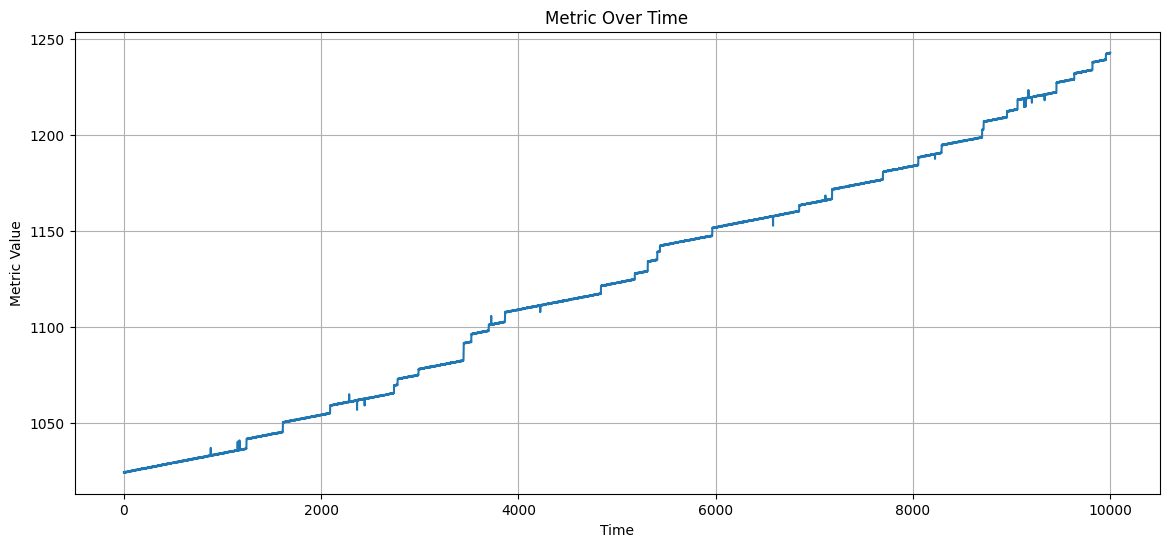

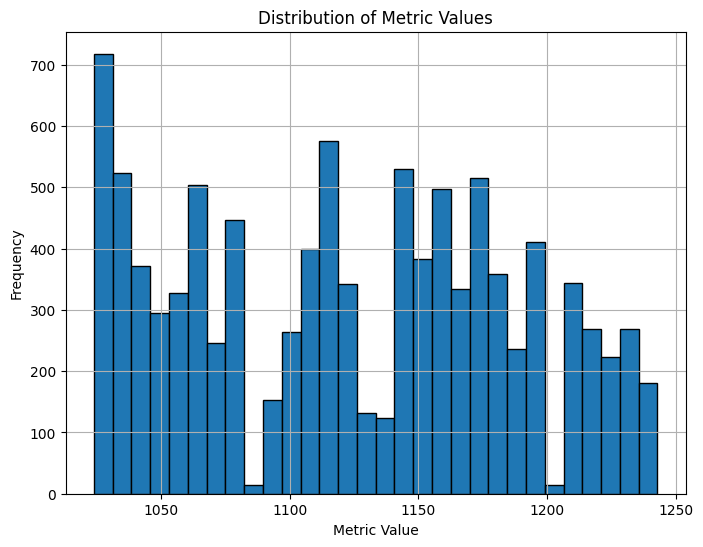

In [10]:
#1. Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/My Drive/Datasets/uni-anom-line.csv')

# Basic statistics
print(data.describe())

# Visualization
plt.figure(figsize=(14, 6))
plt.plot(data['metric'])
plt.title('Metric Over Time')
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['metric'], bins=30, edgecolor='black')
plt.title('Distribution of Metric Values')
plt.xlabel('Metric Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Based on the summary statistics and the graph below, the value "count" of 10,000 indicates the number of observations available in our dataset.This is crucial for determining the dataset's size and the scope of the data being evaluated. When detecting anomalies, it's essential to pinpoint data points that significantly diverge from the norm.

The value "mean" of around 1123.93 serves as a benchmark for what can be considered a typical or expected metric value. In anomaly detection, deviations from this mean value may indicate anomalies. For instance, data points that fall well below or above this mean may require closer examination as potential anomalies.

The value "std" (standard deviation) of approximately 63.65 measures the typical amount of variation in the data. In the context of anomaly detection, a larger standard deviation indicates greater variability in the metric values. Anomalies are often identified by their deviation from the norm, so understanding the standard deviation is crucial in defining the threshold for what constitutes an abnormal deviation.

**2.	Select a simple Scikit-learn method for detection and motivate the choice.**

In [11]:
#2. Simple Scikit-learn Method for Detection
from sklearn.ensemble import IsolationForest

# Data preparation
X = data['metric'].values.reshape(-1, 1)  # Corrected 'value' to 'metric'

# Initialize the IsolationForest model
model = IsolationForest(contamination=0.05)  # assuming 5% of the data might be outliers

# Fit the model
model.fit(X)


IsolationForest(contamination=0.05)

**3.	Create a notebook demonstrating the fitting of the model (if applicable), as well as the test/inference step on a stream using the Sklearn RunInference transform. **

In [ ]:
#3. Deployment on a Stream Using Custom DoFn for Scikit-learn Inference
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

class PredictDoFn(beam.DoFn):
    def __init__(self, model):
        self.model = model

    def process(self, element):
        prediction = self.model.predict([[element]])  # Note the double brackets to reshape the input
        yield (element, prediction[0])

# Beam pipeline
options = PipelineOptions()
p = beam.Pipeline(options=options)

# Simulating a stream using the loaded data
stream_data = p | 'Create Stream' >> beam.Create(data['metric'].tolist())

# Using the model for inference on the stream
inference = (stream_data
             | 'Run Inference' >> beam.ParDo(PredictDoFn(model))
             | 'Write Results' >> beam.io.WriteToText('/content/drive/My Drive/Datasets/output.txt'))

# Run the pipeline
p.run()


**4.	Evaluate the success/correctness of your implementation given the ground truth.**

In [ ]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('/content/drive/My Drive/Datasets/uni-anom-line.csv')

# Load the results from the pipeline
results = pd.read_csv('/content/drive/My Drive/Datasets/output.txt-00000-of-00001', header=None, names=['Value', 'Prediction'])

# Anomalies are marked as -1 by the IsolationForest
detected_anomalies = results[results['Prediction'] == -1]

# Get the actual anomalies from the dataset
actual_anomalies = data[data['anom']]

# ... [previous code]

# Calculate metrics
true_positives = len(detected_anomalies[detected_anomalies['Value'].isin(actual_anomalies['metric'])])
false_positives = len(detected_anomalies) - true_positives
false_negatives = len(actual_anomalies) - true_positives

# Check if true_positives + false_positives is zero to avoid ZeroDivisionError
if (true_positives + false_positives) == 0:
    precision = 0
else:
    precision = true_positives / (true_positives + false_positives)

# Check if true_positives + false_negatives is zero to avoid ZeroDivisionError
if (true_positives + false_negatives) == 0:
    recall = 0
else:
    recall = true_positives / (true_positives + false_negatives)

# If either precision or recall is zero, F1-score will be zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Detected {len(detected_anomalies)} anomalies.")
print(detected_anomalies)


